In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import os

In [59]:
# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
        if img is not None:
            img = img.resize((100, 100))  # Resize images to a common shape
            images.append(np.array(img))
            if folder.endswith('/Bacterialblight'):
                labels.append('Bacterialblight')
            elif folder.endswith('/Brownspot'):
                labels.append('Brownspot')
            elif folder.endswith('/Leafsmut'):
                labels.append('Leafsmut')
            else:
                labels.append('unknown')  # If folder doesn't match any expected label
    return images, labels


In [60]:
# Paths to your dataset on Kaggle
folder_paths = ['/kaggle/input/rice-plant-diseases-dataset/rice leaf diseases dataset/Bacterialblight', 
                '/kaggle/input/rice-plant-diseases-dataset/rice leaf diseases dataset/Brownspot', 
                '/kaggle/input/rice-plant-diseases-dataset/rice leaf diseases dataset/Leafsmut']


In [61]:
images = []
all_labels = []

for folder_path in folder_paths:
    folder_images, folder_labels = load_images_from_folder(folder_path)
    images.extend(folder_images)
    all_labels.extend(folder_labels)

X = np.array(images)
y = np.array(all_labels)

In [62]:
# Normalize and flatten the images
X = X.astype('float32') / 255.0
X = X.reshape(X.shape[0], 100*100)  # Flatten the images


In [63]:
# Shuffle the dataset before splitting
X, y = shuffle(X, y, random_state=42)


In [64]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [66]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
# -----------------------------
# Model Evaluation without PCA
# -----------------------------

Evaluating Model Without PCA...
Cross-validation accuracy (No PCA): 61.41%
Training Accuracy (No PCA): 62.16%
Validation Accuracy (No PCA): 61.69%
Training Loss (No PCA): 13.4018
Testing Loss (No PCA): 13.6076


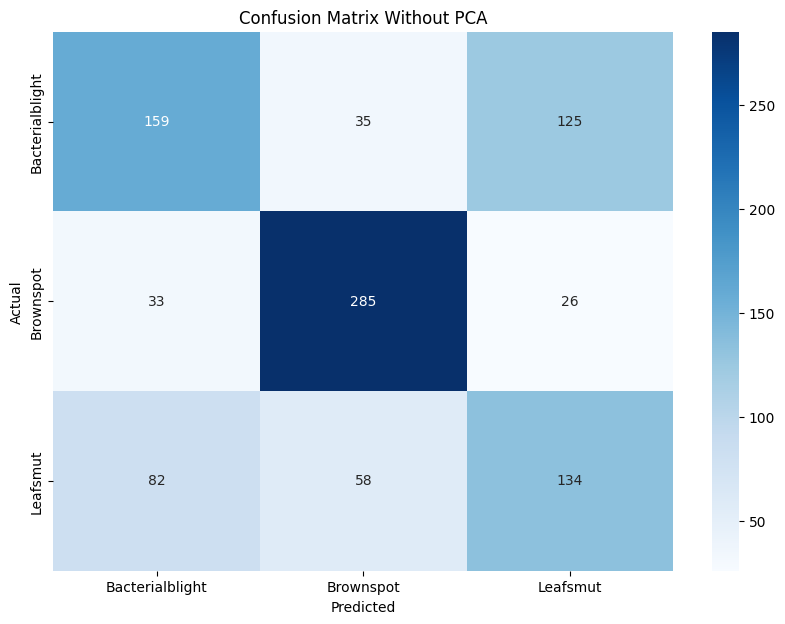

In [68]:
from sklearn.metrics import log_loss

print("Evaluating Model Without PCA...")

# Train a Naive Bayes classifier without PCA
nb_no_pca = GaussianNB()

# Evaluate using cross-validation without PCA
scores_no_pca = cross_val_score(nb_no_pca, X_train_scaled, y_train_encoded, cv=10)
print(f"Cross-validation accuracy (No PCA): {np.mean(scores_no_pca) * 100:.2f}%")

# Fit the model on training data without PCA
nb_no_pca.fit(X_train_scaled, y_train_encoded)

# Training accuracy without PCA
train_accuracy_no_pca = nb_no_pca.score(X_train_scaled, y_train_encoded)
print(f"Training Accuracy (No PCA): {train_accuracy_no_pca * 100:.2f}%")

# Predictions without PCA
y_pred_no_pca = nb_no_pca.predict(X_test_scaled)

# Validation accuracy without PCA
validation_accuracy_no_pca = accuracy_score(y_test_encoded, y_pred_no_pca)
print(f"Validation Accuracy (No PCA): {validation_accuracy_no_pca * 100:.2f}%")

# Calculate training loss (negative log likelihood) for training set
y_train_proba_no_pca = nb_no_pca.predict_proba(X_train_scaled)  # Get training set probabilities
train_loss_no_pca = log_loss(y_train_encoded, y_train_proba_no_pca)
print(f"Training Loss (No PCA): {train_loss_no_pca:.4f}")

# Calculate testing loss (negative log likelihood) for test set
y_test_proba_no_pca = nb_no_pca.predict_proba(X_test_scaled)  # Get test set probabilities
test_loss_no_pca = log_loss(y_test_encoded, y_test_proba_no_pca)
print(f"Testing Loss (No PCA): {test_loss_no_pca:.4f}")

# Confusion matrix without PCA
cm_no_pca = confusion_matrix(y_test_encoded, y_pred_no_pca)

# Visualization without PCA
plt.figure(figsize=(10, 7))
sns.heatmap(cm_no_pca, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Without PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [69]:
# -----------------------------
# Model Evaluation with PCA
# -----------------------------

Evaluating Model With PCA...
Cross-validation accuracy (With PCA): 67.95%
Training Accuracy (With PCA): 68.16%
Validation Accuracy (With PCA): 66.28%
Training Loss (With PCA): 5.1488
Testing Loss (With PCA): 5.3011


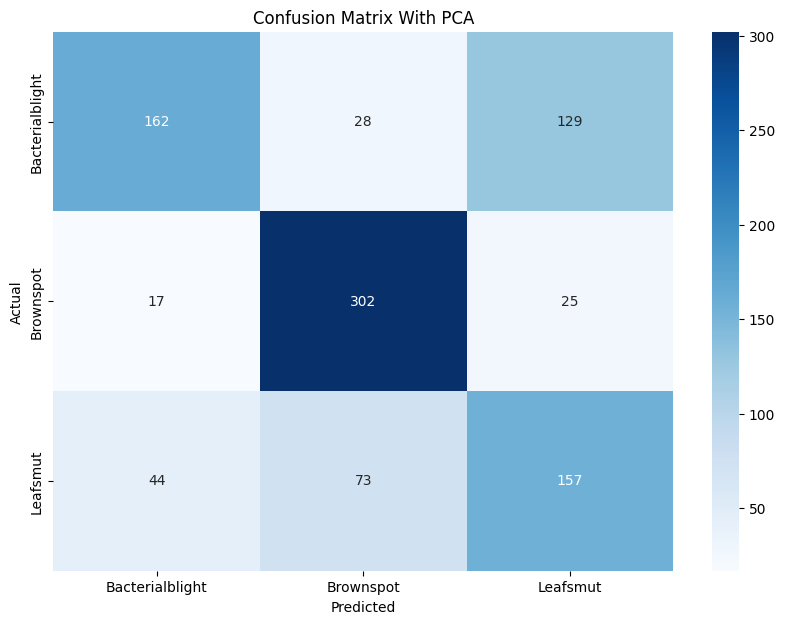

In [70]:
from sklearn.metrics import log_loss

print("Evaluating Model With PCA...")

# Train a Naive Bayes classifier with PCA
nb_with_pca = GaussianNB()

# Evaluate using cross-validation with PCA
scores_with_pca = cross_val_score(nb_with_pca, X_train_pca, y_train_encoded, cv=10)
print(f"Cross-validation accuracy (With PCA): {np.mean(scores_with_pca) * 100:.2f}%")

# Fit the model on training data with PCA
nb_with_pca.fit(X_train_pca, y_train_encoded)

# Training accuracy with PCA
train_accuracy_with_pca = nb_with_pca.score(X_train_pca, y_train_encoded)
print(f"Training Accuracy (With PCA): {train_accuracy_with_pca * 100:.2f}%")

# Predictions with PCA
y_pred_with_pca = nb_with_pca.predict(X_test_pca)

# Validation accuracy with PCA
validation_accuracy_with_pca = accuracy_score(y_test_encoded, y_pred_with_pca)
print(f"Validation Accuracy (With PCA): {validation_accuracy_with_pca * 100:.2f}%")

# Calculate training loss (negative log likelihood) for training set with PCA
y_train_proba_with_pca = nb_with_pca.predict_proba(X_train_pca)  # Get training set probabilities
train_loss_with_pca = log_loss(y_train_encoded, y_train_proba_with_pca)
print(f"Training Loss (With PCA): {train_loss_with_pca:.4f}")

# Calculate testing loss (negative log likelihood) for test set with PCA
y_test_proba_with_pca = nb_with_pca.predict_proba(X_test_pca)  # Get test set probabilities
test_loss_with_pca = log_loss(y_test_encoded, y_test_proba_with_pca)
print(f"Testing Loss (With PCA): {test_loss_with_pca:.4f}")

# Confusion matrix with PCA
cm_with_pca = confusion_matrix(y_test_encoded, y_pred_with_pca)

# Visualization with PCA
plt.figure(figsize=(10, 7))
sns.heatmap(cm_with_pca, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix With PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


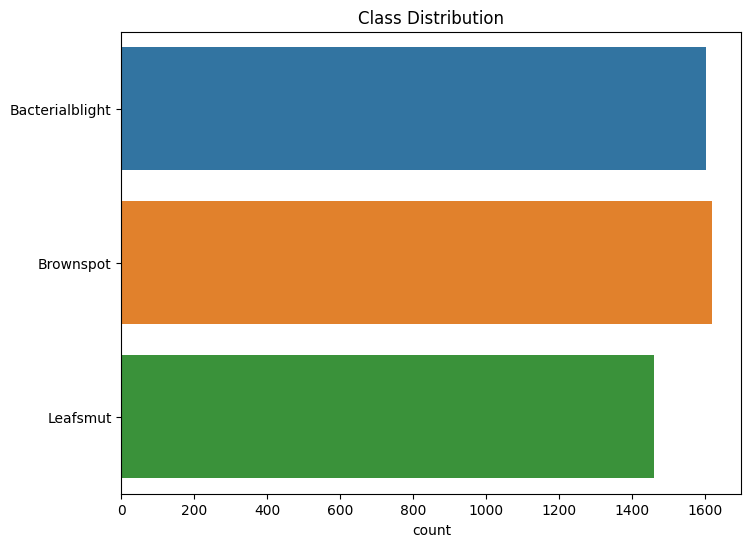

In [71]:
# Bar chart for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=y, order=label_encoder.classes_)
plt.title('Class Distribution')
plt.show()


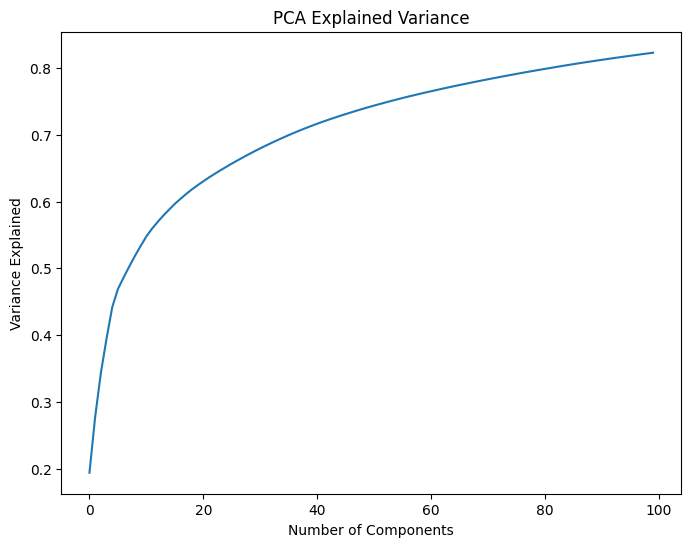

In [72]:
# Plot explained variance ratio by PCA
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance')
plt.show()

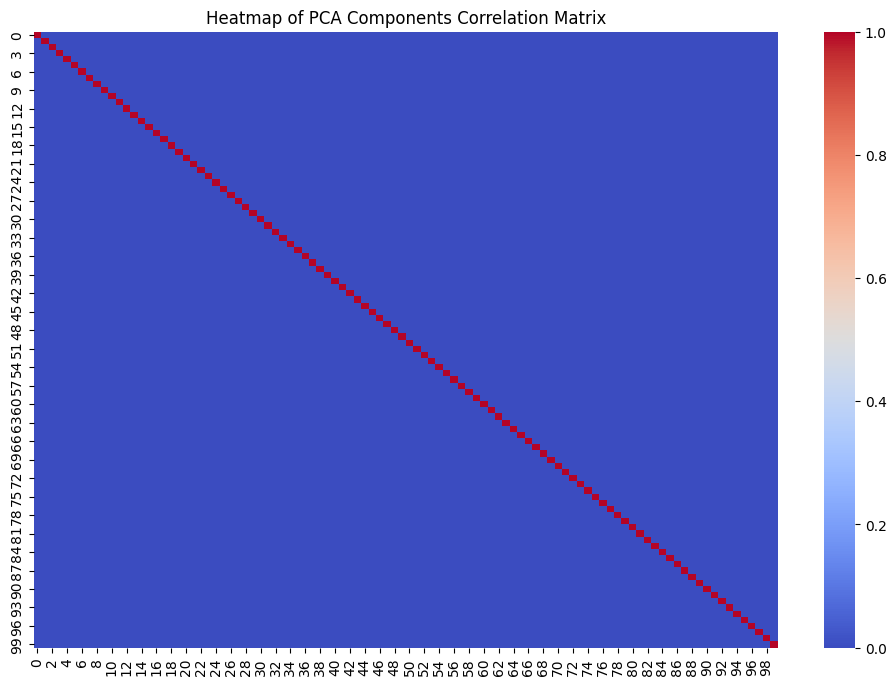

In [73]:
# Heatmap for the correlation matrix of principal components
pca_corr_matrix = np.corrcoef(X_train_pca.T)
plt.figure(figsize=(12, 8))
sns.heatmap(pca_corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of PCA Components Correlation Matrix')
plt.show()

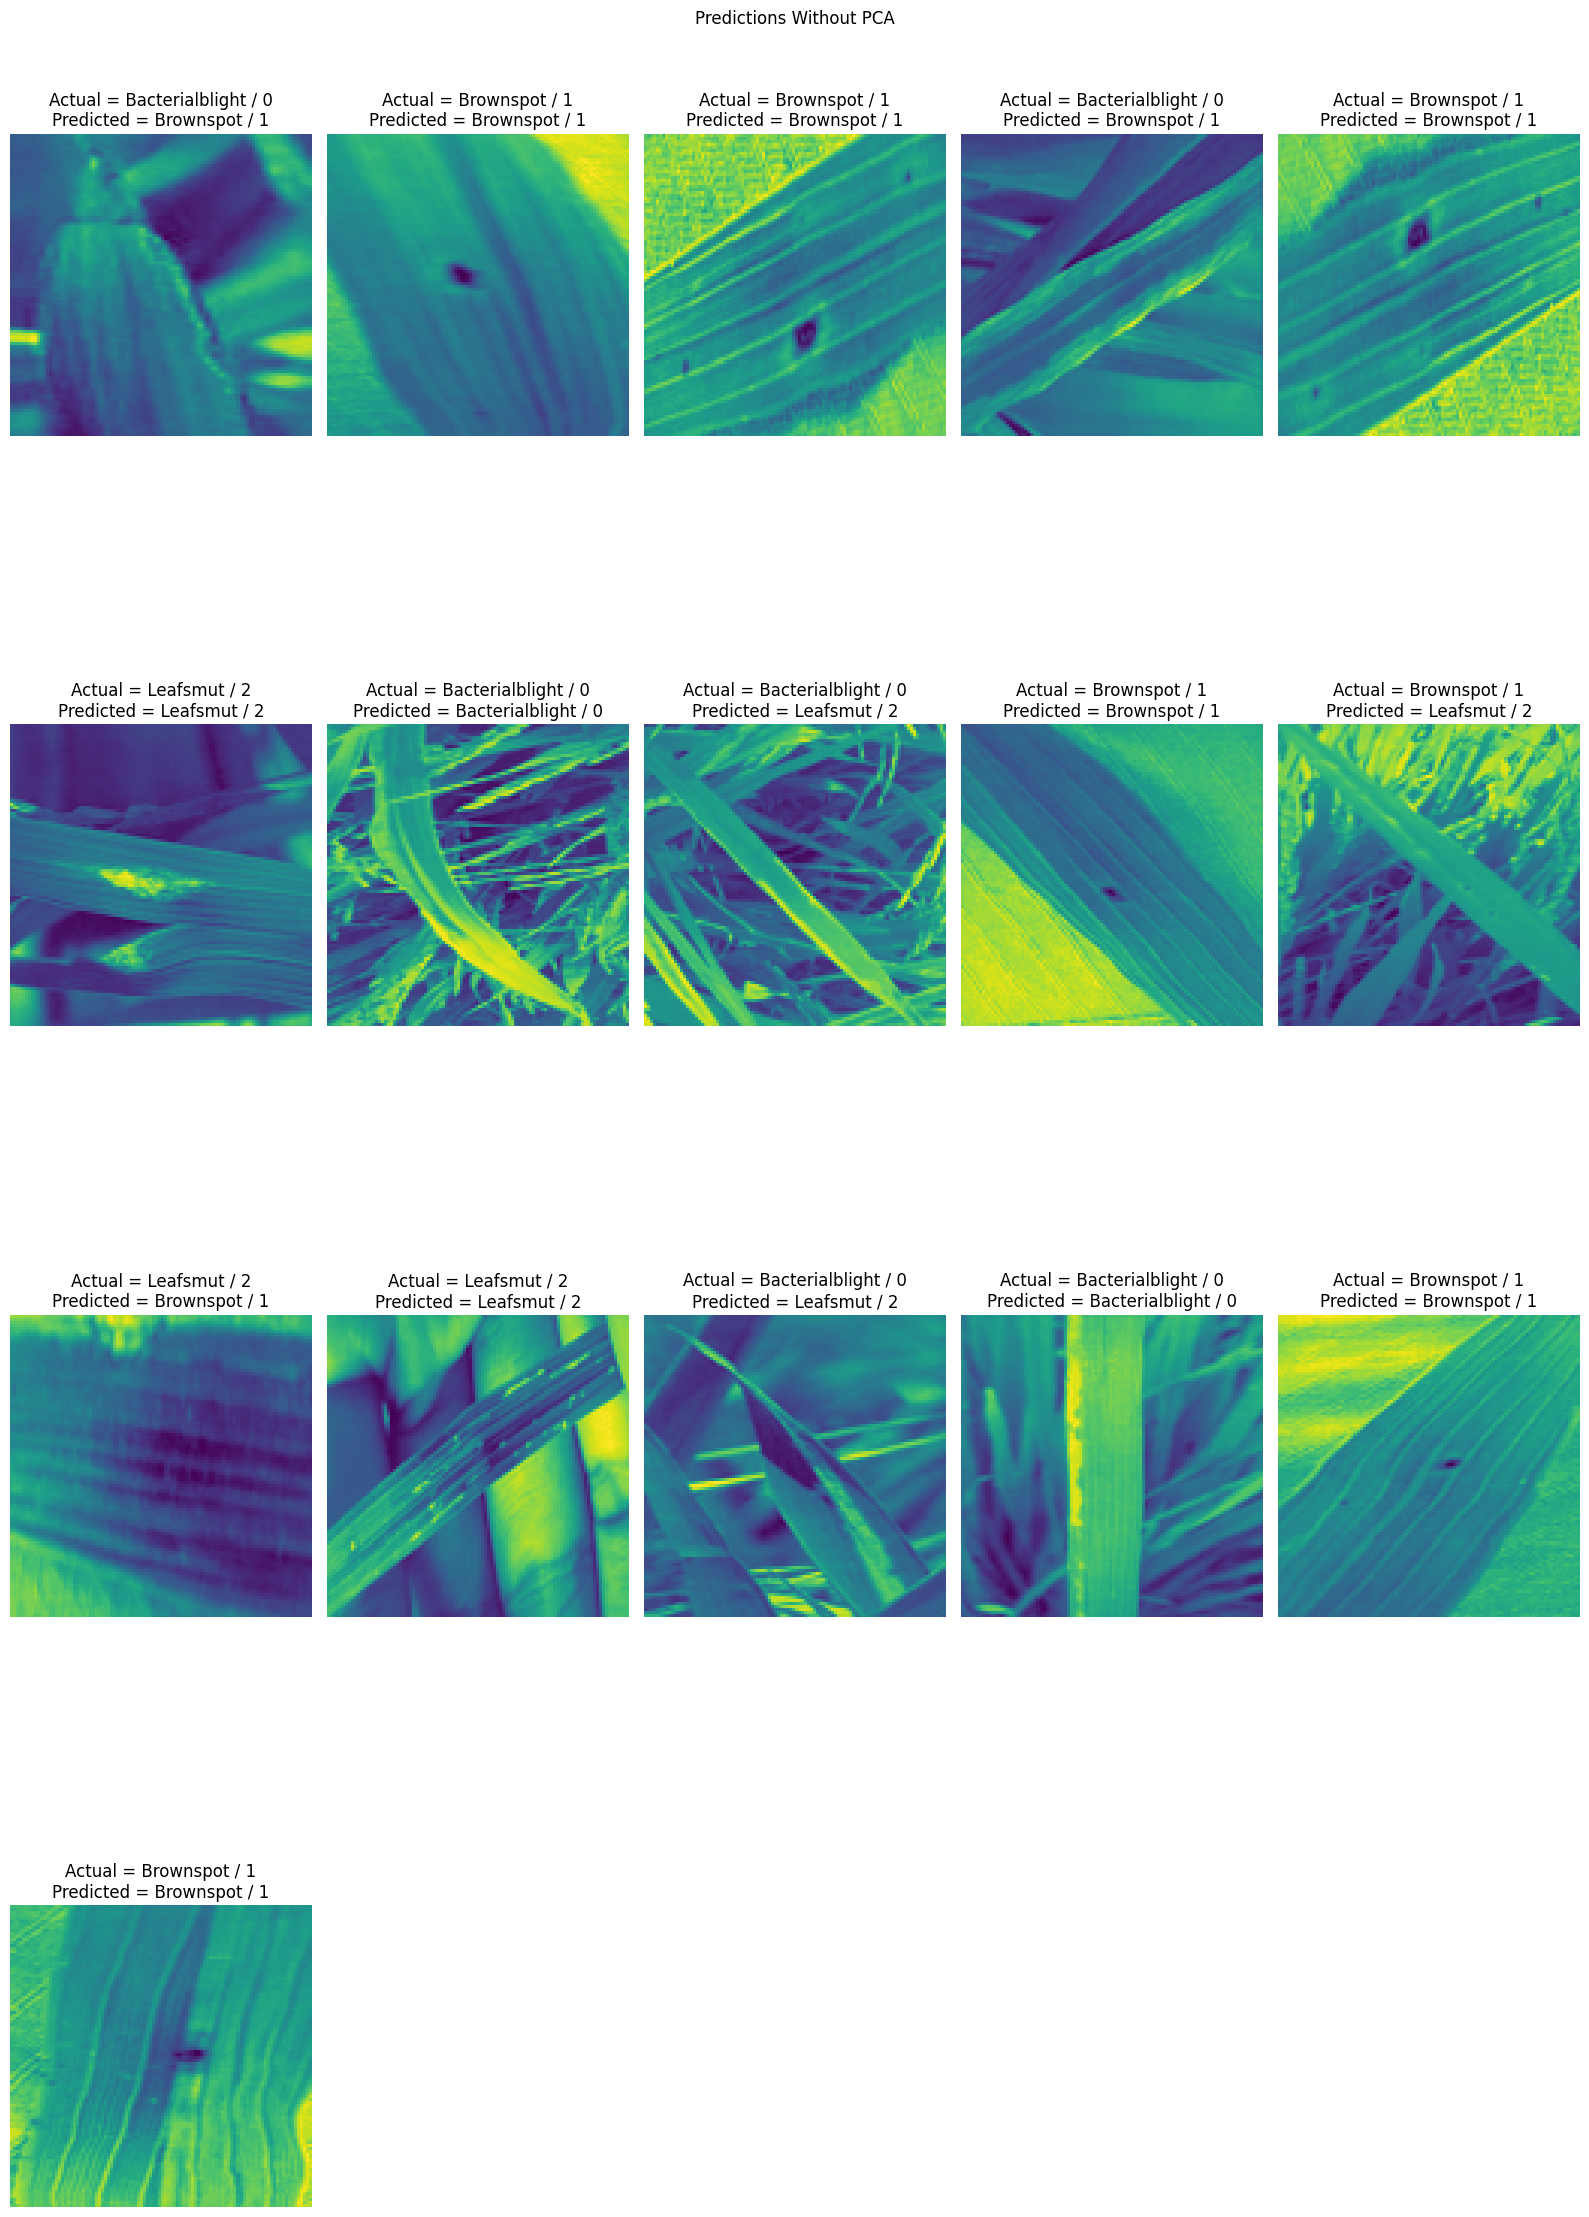

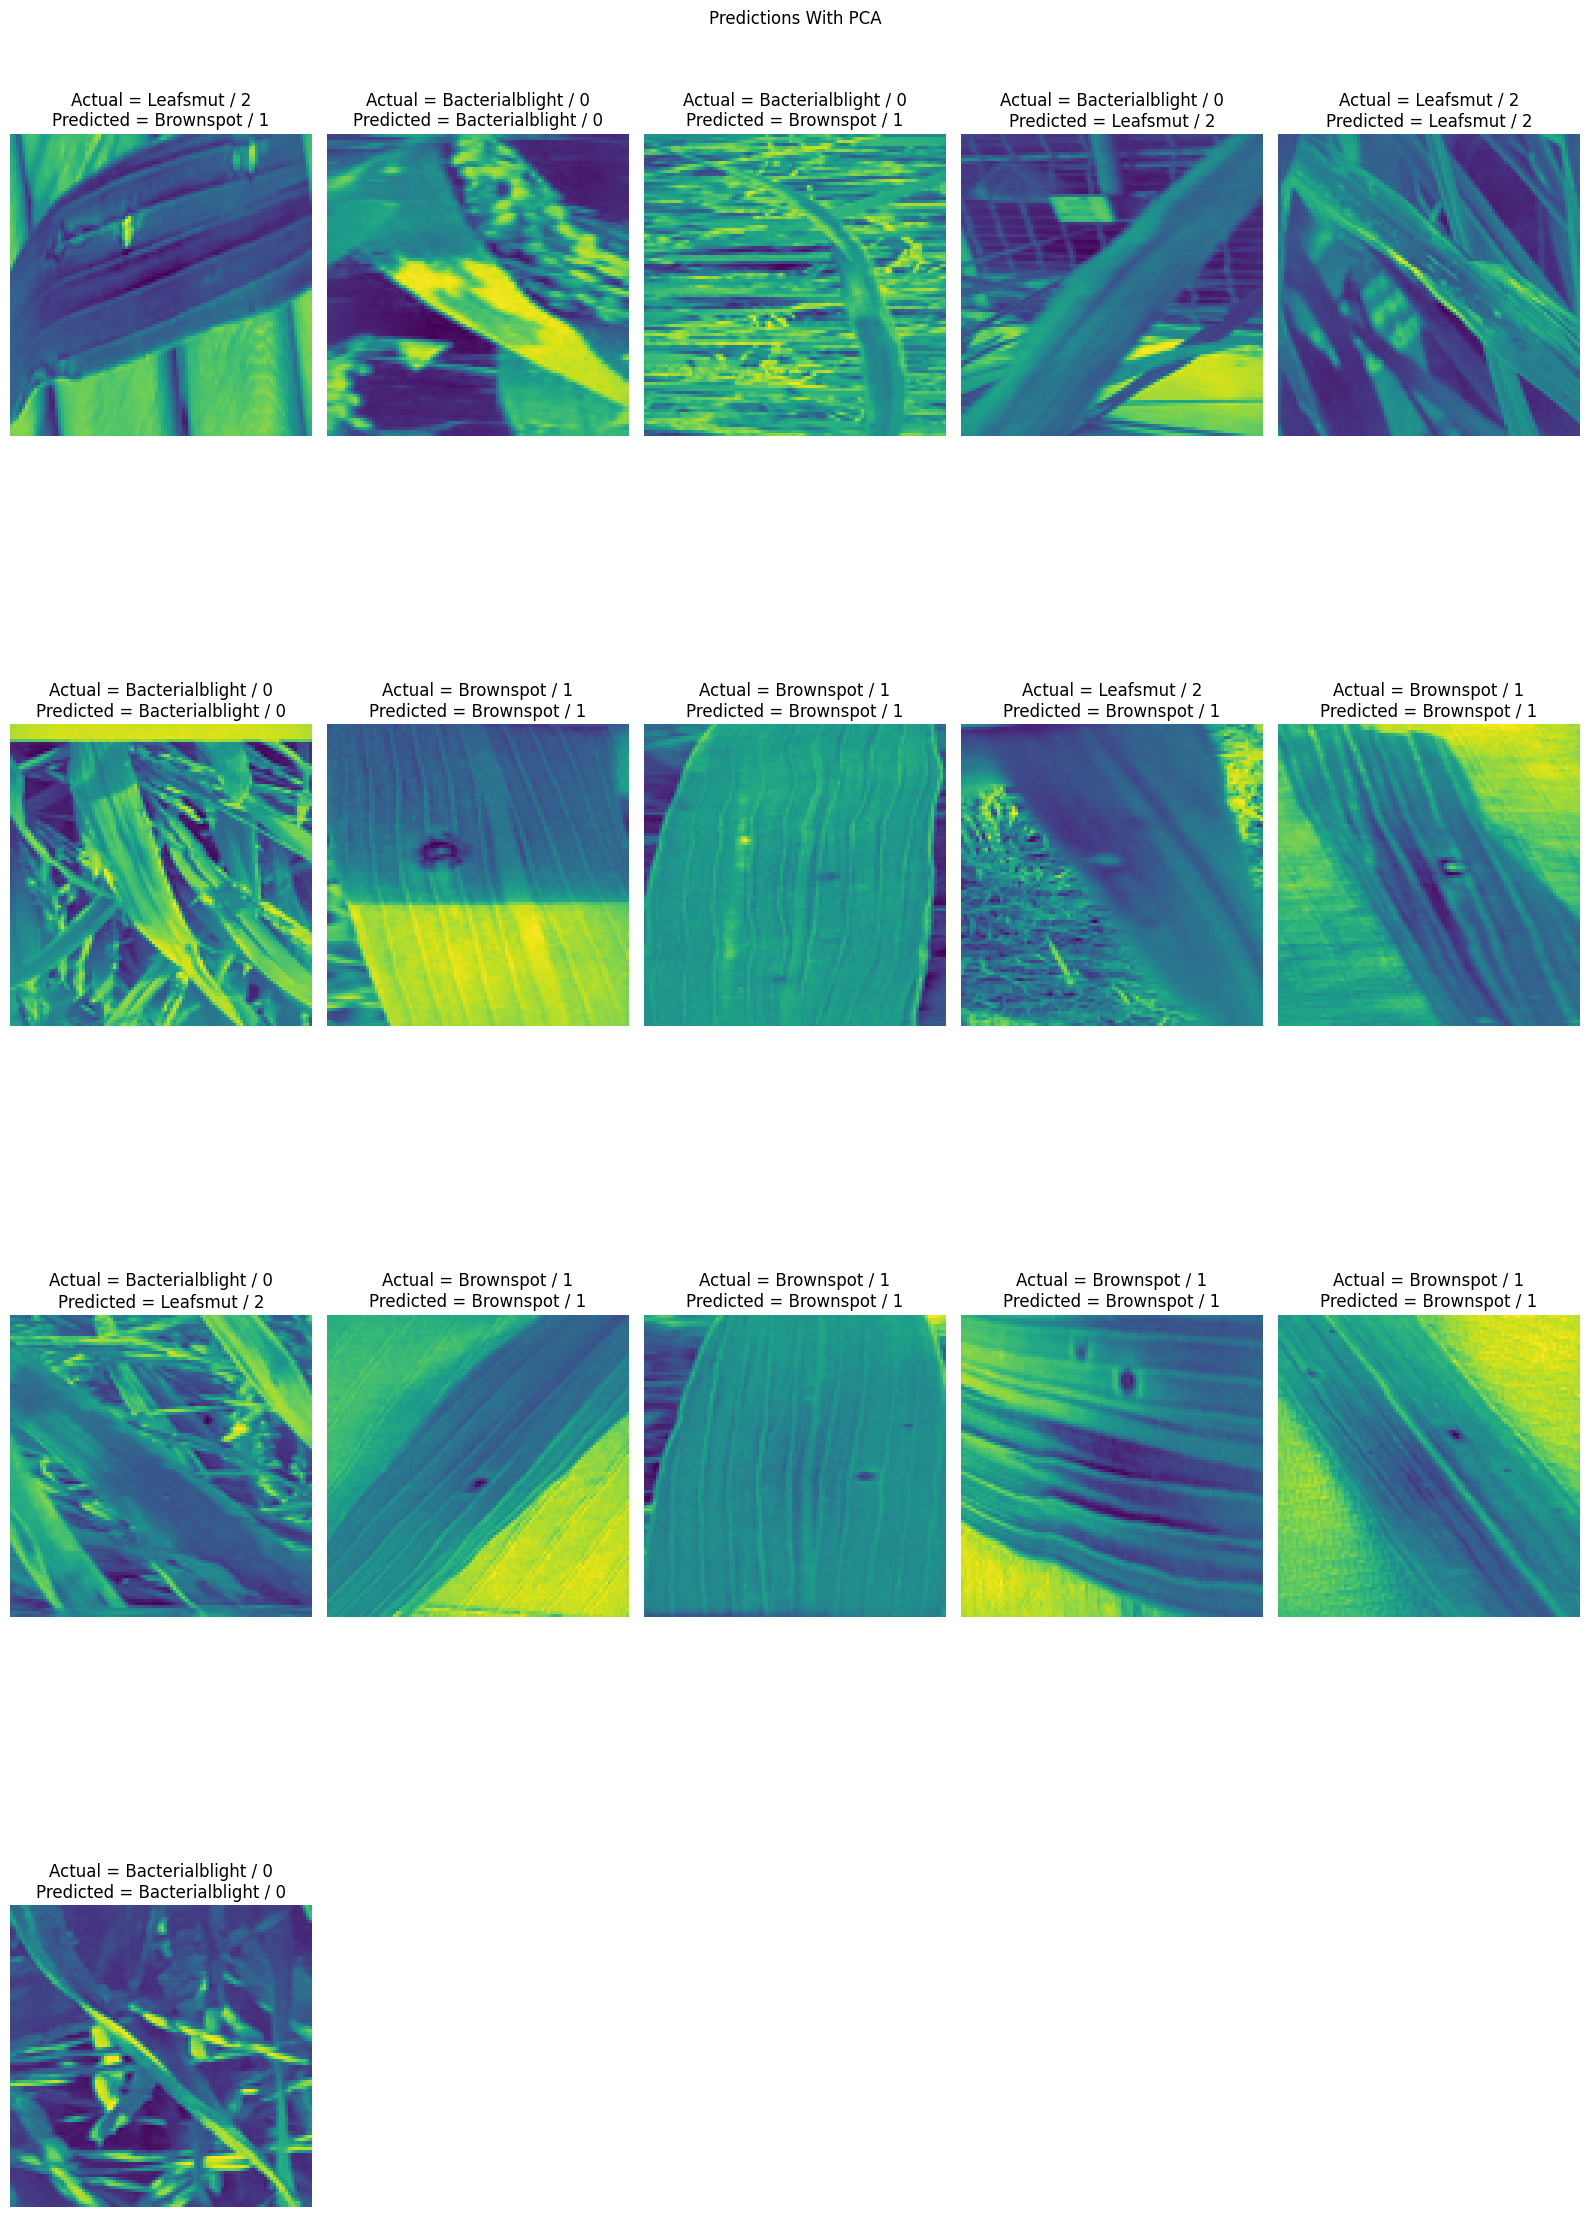

In [74]:
# Define class_labels globally
class_labels = label_encoder.classes_

# Modified visualize_predictions function to include class_labels as a parameter
def visualize_predictions(X_test, y_test_encoded, y_pred, title, class_labels, use_pca=False):
    plt.figure(figsize=(16, 30))
    j = 1
    for i in np.random.randint(0, len(X_test), 16):
        if use_pca:
            img = X_test_scaled[i].reshape(100, 100)  # Use the original test images
        else:
            img = X_test[i].reshape(100, 100)  # Reshape to 100x100 for display

        plt.subplot(5, 5, j)
        j += 1
        plt.imshow(img)
        plt.axis('off')
        plt.title('Actual = {} / {}\nPredicted = {} / {}'.format(
            class_labels[y_test_encoded[i]], y_test_encoded[i], 
            class_labels[y_pred[i]], y_pred[i]
        ))
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualization without PCA
visualize_predictions(X_test_scaled, y_test_encoded, y_pred_no_pca, 'Predictions Without PCA', class_labels, use_pca=False)

# Visualization with PCA
visualize_predictions(X_test_pca, y_test_encoded, y_pred_with_pca, 'Predictions With PCA', class_labels, use_pca=True)
